## Download dataset

In [1]:
! wget https://www.openslr.org/resources/1/waves_yesno.tar.gz

--2021-03-24 19:33:28--  https://www.openslr.org/resources/1/waves_yesno.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4703754 (4.5M) [application/x-gzip]
Saving to: ‘waves_yesno.tar.gz’

waves_yesno.tar.gz  100%[===================>]   4.49M  2.49MB/s    in 1.8s    

2021-03-24 19:33:31 (2.49 MB/s) - ‘waves_yesno.tar.gz’ saved [4703754/4703754]



In [2]:
! tar -xvzf waves_yesno.tar.gz

x waves_yesno/
x waves_yesno/1_0_0_0_0_0_1_1.wav
x waves_yesno/1_1_0_0_1_0_1_0.wav
x waves_yesno/1_0_1_1_1_1_0_1.wav
x waves_yesno/1_1_1_1_0_1_0_0.wav
x waves_yesno/0_0_1_1_1_0_0_0.wav
x waves_yesno/0_1_1_1_1_1_1_1.wav
x waves_yesno/0_1_0_1_1_1_0_0.wav
x waves_yesno/1_0_1_1_1_0_1_0.wav
x waves_yesno/1_0_0_1_0_1_1_1.wav
x waves_yesno/0_0_1_0_1_0_0_0.wav
x waves_yesno/0_1_0_1_1_0_1_0.wav
x waves_yesno/0_0_1_1_0_1_1_0.wav
x waves_yesno/1_0_0_0_1_0_0_1.wav
x waves_yesno/1_1_0_1_1_1_1_0.wav
x waves_yesno/0_0_1_1_1_1_0_0.wav
x waves_yesno/1_1_0_0_1_1_1_0.wav
x waves_yesno/0_0_1_1_0_1_1_1.wav
x waves_yesno/1_1_0_1_0_1_1_0.wav
x waves_yesno/0_1_0_0_0_1_1_0.wav
x waves_yesno/0_0_0_1_0_0_0_1.wav
x waves_yesno/0_0_1_0_1_0_1_1.wav
x waves_yesno/0_0_1_0_0_0_1_0.wav
x waves_yesno/1_1_0_1_1_0_0_1.wav
x waves_yesno/0_1_1_1_0_1_0_1.wav
x waves_yesno/0_1_1_1_0_0_0_0.wav
x waves_yesno/README~
x waves_yesno/0_1_0_0_0_1_0_0.wav
x waves_yesno/1_0_0_0_0_0_0_1.wav
x waves_yesno/1_1_0_1_1_0_1_1.wav
x waves_yes

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import matplotlib.colors as colors

In [5]:

filepath = 'waves_yesno/'
fs, data= wavfile.read(filepath + '0_0_0_0_1_1_1_1.wav')


In [6]:
ini = 7000-1
end = 10500+1

# ini = 26000
# end = 30000

data_zoom = data[ini:end]

tick_size = 14
label_size = 16

t_plot_1 =0.5
t_plot_2 = 6.25
t_inds = np.arange(len(data))/fs

## Signal in time domain

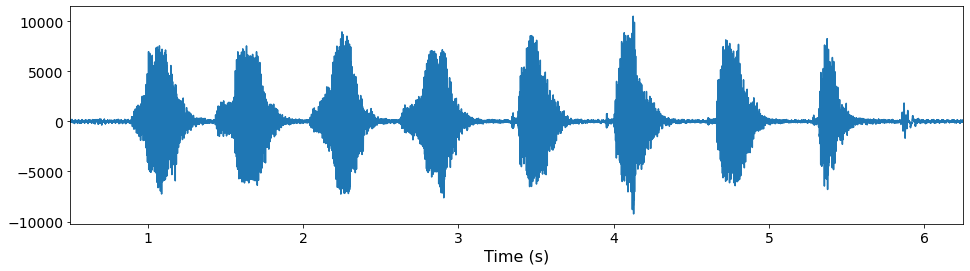

In [7]:
plt.figure(figsize=(16,4))
plt.plot(t_inds,data)
plt.xlabel('Time (s)',fontsize=label_size)
plt.xlim([t_plot_1,t_plot_2])
plt.tick_params(labelsize=tick_size)

## Signal zoomed in

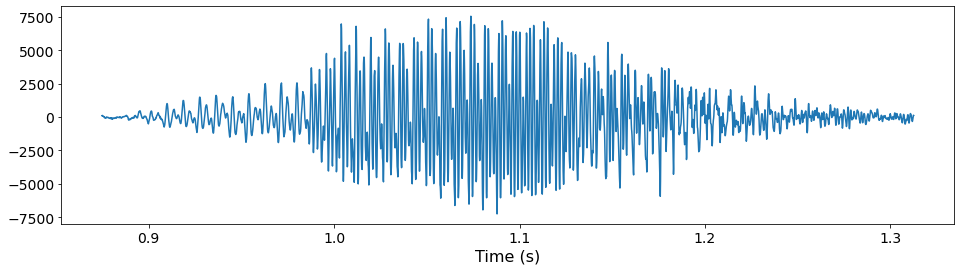

In [8]:
plt.figure(figsize=(16,4))
plt.plot(t_inds[ini:end],data_zoom)
plt.xlabel('Time (s)',fontsize=label_size)
plt.tick_params(labelsize=tick_size)

## FFT of the signal

(-4000.0, 4000.0)

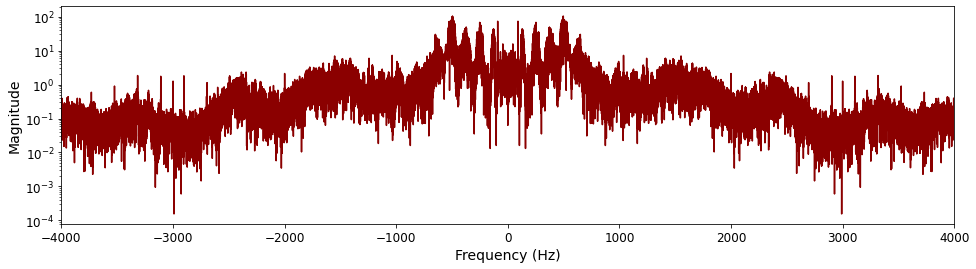

In [9]:
ft = np.fft.fft(data)
n = len(data)
plt.figure(figsize=(16,4))
freq_samples = np.linspace(-fs/2,fs/2,n)# np.arange(-fs/2,fs/n,fs/2)
plt.plot(freq_samples,np.abs(np.fft.fftshift(ft))/n,color='darkred')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.ylabel('Magnitude',fontsize=14)
plt.xlabel('Frequency (Hz)',fontsize=14)
plt.xlim((-4000,4000))

## STFT of the signal

In [10]:
f, t, stft_coeffs = signal.stft(data, fs, nperseg=500,return_onesided=True)

Text(0.5, 0, 'Time (s)')

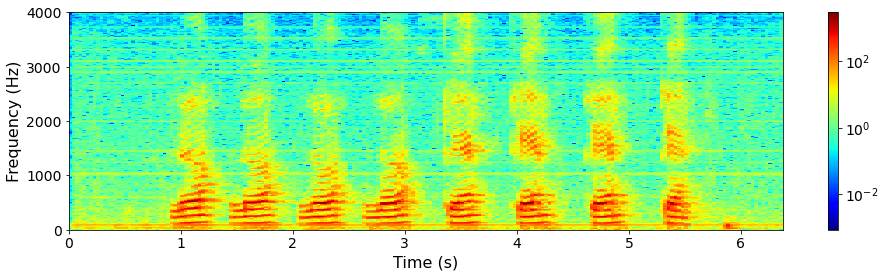

In [12]:
plt.figure(figsize=(16,4))
mag_stft_coeffs = np.abs(stft_coeffs)
plt.pcolormesh(t, f, np.abs(mag_stft_coeffs),norm=colors.LogNorm(vmin=mag_stft_coeffs.min(), vmax=mag_stft_coeffs.max()),cmap='jet') # vmin=0, vmax=amp
# plt.yscale('log')
cb = plt.colorbar()
# plt.show()
plt.tick_params(labelsize=tick_size)
cb.ax.tick_params(labelsize=tick_size)
plt.ylabel('Frequency (Hz)',fontsize=label_size)
plt.xlabel('Time (s)',fontsize=label_size)